In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Given data
data = {
    "Hours Studied": [2, 3, 4, 5, 6, 7,9],
    "Hours Watching TV": [4, 3, 2, 1, 0, 0,9],
    "Outdoor Activity Time": [2, 4, 6, 8, 10, 12,9],
    "Hours Listening to Music": [2, 3, 4, 1, 5, 0,9],
    "Water Consumed": [5, 6, 5, 6, 4, 5,9],
    "Test Score": [65, 70, 75, 80, 85, 90,9]
}

In [3]:
#converting to dataframe
df=pd.DataFrame(data)

In [4]:
df

,Hours Studied,Hours Watching TV,Outdoor Activity Time,Hours Listening to Music,Water Consumed,Test Score
0,2,4,2,2,5,65
1,3,3,4,3,6,70
2,4,2,6,4,5,75
3,5,1,8,1,6,80
4,6,0,10,5,4,85
5,7,0,12,0,5,90
6,9,9,9,9,9,9


In [5]:
corrr=np.cov(df,rowvar=False)

In [6]:
print(corrr)

[[ 5.80952381e+00  2.21428571e+00  7.11904762e+00  3.59523810e+00
   2.04761905e+00 -2.94523810e+01]
 [ 2.21428571e+00  9.90476190e+00 -2.90476190e+00  6.97619048e+00
   4.40476190e+00 -8.42619048e+01]
 [ 7.11904762e+00 -2.90476190e+00  1.22380952e+01  6.90476190e-01
   2.61904762e-01  9.59523810e+00]
 [ 3.59523810e+00  6.97619048e+00  6.90476190e-01  8.95238095e+00
   2.97619048e+00 -6.65238095e+01]
 [ 2.04761905e+00  4.40476190e+00  2.61904762e-01  2.97619048e+00
   2.57142857e+00 -3.95952381e+01]
 [-2.94523810e+01 -8.42619048e+01  9.59523810e+00 -6.65238095e+01
  -3.95952381e+01  7.43238095e+02]]


In [5]:
def corr_coef(x, y):
    mean_x = x.mean()
    mean_y = y.mean()
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    corr = numerator / denominator
    return corr

Based on the provided data, calculate and interpret the correlation coefficient for each variable in relation to the test scores. Identify the variables that show a positive correlation, a negative correlation, and no significant correlation with the test scores.

In [6]:
corr_hours_studied = corr_coef(df["Hours Studied"], df["Test Score"])
corr_hours_watching_tv = corr_coef(df["Hours Watching TV"], df["Test Score"])
corr_hours_listening_to_music = corr_coef(df["Hours Listening to Music"], df["Test Score"])
corr_water_consumed = corr_coef(df["Water Consumed"], df["Test Score"])
corr_outdoor_activity_time = corr_coef(df["Outdoor Activity Time"], df["Test Score"])

In [7]:
def interpretation(corr):
    if corr > 0:
        return " positive correlation"
    elif corr < 0:
        return "negative correlation"
    else:
        return "no significant correlation"

In [8]:
print("hours studied vs score:",interpretation(corr_hours_studied))
print("Hours Watching TV vs score:",interpretation(corr_hours_watching_tv))
print("Hours Listening to Music vs score:",interpretation(corr_hours_listening_to_music))
print("Water Consumed vs score:",interpretation(corr_water_consumed))
print("Outdoor Activity Time vs score:",interpretation(corr_outdoor_activity_time))

hours studied vs score:  positive correlation
Hours Watching TV vs score: negative correlation
Hours Listening to Music vs score: negative correlation
Water Consumed vs score: negative correlation
Outdoor Activity Time vs score:  positive correlation


###  Q)Explain why there might be a positive correlation between the "Hours Studied" variable and the test scores. Provide a brief discussion on how this information could be valuable for improving academic performance.

### Q)Calculate and interpret the correlation coefficient between "Hours Watching TV" and test scores. Explain the implications of this correlation in terms of academic achievement and time management.

### Q)Calculate and interpret the correlation coefficient between "Hours Listening to Music" and test scores. Discuss the potential impact of this correlation on concentration and study habits.

### Calculate and interpret the correlation coefficient between "Water Consumed" and test scores. Provide a potential explanation for the observed correlation and its relevance to cognitive function.

### Calculate and interpret the correlation coefficient between "Outdoor Activity Time" and test scores. Discuss how physical activity might influence academic performance.

In [9]:
# Calculate correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        corr_matrix.loc[col1, col2] = corr_coef(df[col1], df[col2])

corr_matrix = corr_matrix.astype(float)

# Correlation matrix

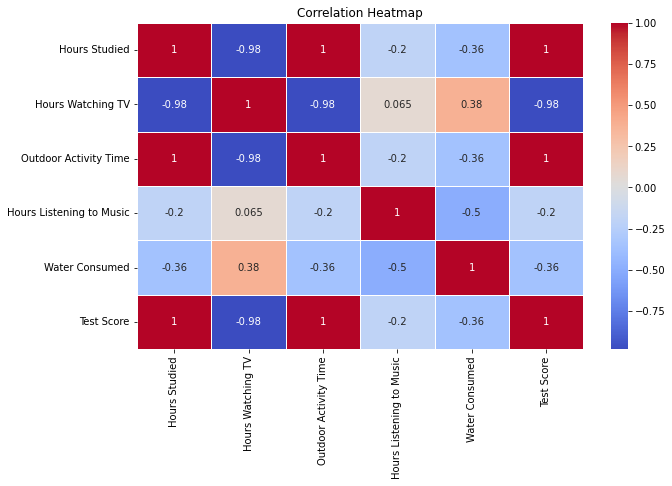

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.6)
plt.title("Correlation Heatmap")
plt.show()